In [1]:
!apt-get install -y unrar


Reading package lists... Done
Building dependency tree       
Reading state information... Done
unrar is already the newest version (1:5.6.6-2build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/')


In [4]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (551).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5510).jpg  
  inflating: Rice_Image_Dataset/Karacadag/K

In [1]:
# Using OS library to load our image folder 

import os

folder_path = "Rice_Image_Dataset"

# List all files in the folder
file_list = os.listdir(folder_path)


# Print the list of files
print(file_list)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Minist_Data'

In [3]:
# All oother libraries we use further

import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential


#loading our path to variable data dir for operations on image, 
data_dir = pathlib.Path(folder_path)
data_dir

WindowsPath('Rice_Image_Dataset')

In [4]:
import random

image_count = len(list(data_dir.glob('*/*.jpg')))
image_count


75000

In [5]:
#Arborio list
Arborio = list(data_dir.glob('Arborio/*'))

# Select 1000 random images from the list
Arborio_images = random.sample(Arborio, k=500)

Arborio_images[:5]

[WindowsPath('Rice_Image_Dataset/Arborio/Arborio (2782).jpg'),
 WindowsPath('Rice_Image_Dataset/Arborio/Arborio (3658).jpg'),
 WindowsPath('Rice_Image_Dataset/Arborio/Arborio (1308).jpg'),
 WindowsPath('Rice_Image_Dataset/Arborio/Arborio (2172).jpg'),
 WindowsPath('Rice_Image_Dataset/Arborio/Arborio (11070).jpg')]

In [6]:
#Basmati list

Basmati = list(data_dir.glob('Basmati/*'))

# Select 1000 random images from the list
Basmati_images = random.sample(Basmati, k=500)

Basmati_images[:5]

[WindowsPath('Rice_Image_Dataset/Basmati/basmati (9444).jpg'),
 WindowsPath('Rice_Image_Dataset/Basmati/basmati (3753).jpg'),
 WindowsPath('Rice_Image_Dataset/Basmati/basmati (3).jpg'),
 WindowsPath('Rice_Image_Dataset/Basmati/basmati (13119).jpg'),
 WindowsPath('Rice_Image_Dataset/Basmati/basmati (2).jpg')]

In [7]:
#Ipsala list

Ipsala = list(data_dir.glob('Ipsala/*'))

# Select 1000 random images from the list
Ipsala_images = random.sample(Ipsala, k=500)

Ipsala_images[:5]

[WindowsPath('Rice_Image_Dataset/Ipsala/Ipsala (6019).jpg'),
 WindowsPath('Rice_Image_Dataset/Ipsala/Ipsala (8748).jpg'),
 WindowsPath('Rice_Image_Dataset/Ipsala/Ipsala (5300).jpg'),
 WindowsPath('Rice_Image_Dataset/Ipsala/Ipsala (8039).jpg'),
 WindowsPath('Rice_Image_Dataset/Ipsala/Ipsala (1721).jpg')]

In [8]:
# Jasmine  list

Jasmine = list(data_dir.glob('Jasmine/*'))

# Select 1000 random images from the list
Jasmine_images = random.sample(Jasmine, k=500)

Jasmine_images[:5]

[WindowsPath('Rice_Image_Dataset/Jasmine/Jasmine (129).jpg'),
 WindowsPath('Rice_Image_Dataset/Jasmine/Jasmine (1243).jpg'),
 WindowsPath('Rice_Image_Dataset/Jasmine/Jasmine (12188).jpg'),
 WindowsPath('Rice_Image_Dataset/Jasmine/Jasmine (12359).jpg'),
 WindowsPath('Rice_Image_Dataset/Jasmine/Jasmine (14639).jpg')]

In [9]:
# Karacadag  list

Karacadag = list(data_dir.glob('Karacadag/*'))

# Select 1000 random images from the list
Karacadag_images = random.sample(Karacadag, k=500)

Karacadag_images[:5]

[WindowsPath('Rice_Image_Dataset/Karacadag/Karacadag (3019).jpg'),
 WindowsPath('Rice_Image_Dataset/Karacadag/Karacadag (6728).jpg'),
 WindowsPath('Rice_Image_Dataset/Karacadag/Karacadag (5723).jpg'),
 WindowsPath('Rice_Image_Dataset/Karacadag/Karacadag (12390).jpg'),
 WindowsPath('Rice_Image_Dataset/Karacadag/Karacadag (9423).jpg')]

In [10]:
len(Karacadag_images)

500

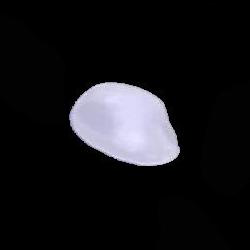

In [11]:
PIL.Image.open(str(Karacadag_images[0]))

In [12]:
#Now creating 2 dic for training purpose

In [13]:
# Image Dic

image_dict = {
    'Basmati_images': list(Basmati_images),
    'Ipsala_images': list(Ipsala_images),
    'Arborio_images': list(Arborio_images),
    'Jasmine_images': list(Jasmine_images),
    'Karacadag_images': list(Karacadag_images)

}

In [14]:
#label dic

lable_dict = {
    'Basmati_images': 0,
    'Ipsala_images': 1,
    'Arborio_images': 2,
    'Jasmine_images': 3,
    'Karacadag_images': 4
}

In [15]:
img = cv2.imread(str(image_dict['Basmati_images'][0]))
img.shape

(250, 250, 3)

In [16]:

#resizing our image and creating x and y lists which takes resized image and its label from the above dic

x = []
y = []


for file_name, images in image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        try:
          resized_image = cv2.resize(img, (180,180), interpolation=cv2.INTER_AREA)
          x.append(resized_image)
          y.append(lable_dict[file_name])
        except:
          break

In [17]:
x[0].shape

(180, 180, 3)

In [18]:
y[200:220]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [19]:
#converting our x and y to array for train test split

x = np.array(x)
y = np.array(y)

In [20]:
x.shape

(2500, 180, 180, 3)

In [21]:
y.shape

(2500,)

In [22]:
# train test split our data, splitting 20% data as a testing and 80% for training

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [23]:
#checking the length of our training data
len(X_train)

2000

In [24]:

#checking the length of our test data

len(X_test)

500

In [25]:
type(X_train)

numpy.ndarray

In [26]:
#sclaing our image vector data for better accuracy

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

MemoryError: Unable to allocate 371. MiB for an array with shape (500, 180, 180, 3) and data type float64

In [27]:
X_train_scaled.shape

(2000, 180, 180, 3)

In [30]:
X_test_scaled.shape

(500, 180, 180, 3)

In [31]:
X_train_flattened = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
X_test_flattened = X_test_scaled.reshape(X_test_scaled.shape[0], -1)


In [ ]:
# Model part


In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# Define the parameter grid for grid search
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
#Task-1 Random Forest Classifier

In [ ]:
# Perform grid search to find the best parameters
rf_classifier = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5)
grid_search_rf.fit(X_train_flattened, y_train)

# Get the best random forest classifier
best_rf_classifier = grid_search_rf.best_estimator_
rf_predictions = best_rf_classifier.predict(X_test_flattened)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Best Random Forest Parameters:", grid_search_rf.best_params_)

Random Forest Classifier Accuracy: 0.966
Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}


In [ ]:
#RF basic one

In [35]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_flattened, y_train)

rf_predictions = rf_classifier.predict(X_test_flattened)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Basic Random Forest Classifier Accuracy:", rf_accuracy)

Basic Random Forest Classifier Accuracy: 0.97


In [ ]:
# Task 2: Multilayer Perceptron (MLP) Classifier

In [ ]:

# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid_mlp = {
    'hidden_layer_sizes': [(20,), (20, 15), (20, 15, 10)],
    'alpha': [0.0001, 0.001, 0.01]
}

# Perform grid search to find the best parameters
mlp_classifier = MLPClassifier(random_state=42)
grid_search_mlp = GridSearchCV(mlp_classifier, param_grid_mlp, cv=5)
grid_search_mlp.fit(X_train_flattened, y_train)

# Get the best MLP classifier
best_mlp_classifier = grid_search_mlp.best_estimator_
mlp_predictions = best_mlp_classifier.predict(X_test_flattened)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)

print("MLP Classifier Accuracy:", mlp_accuracy)
print("Best MLP Parameters:", grid_search_mlp.best_params_)


In [ ]:
#The BAsic One

In [32]:
# Create the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(20, 15, 10), activation='logistic', random_state=42)

# Train the MLP classifier
mlp_classifier.fit(X_train_flattened, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(20, 15, 10),
              random_state=42)

In [34]:
# Predict the labels for the test set
y_pred = mlp_classifier.predict(X_test_flattened)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.756


In [36]:
# Task 3: Deep Convolutional Neural Network (CNN)

In [37]:
X_train_reshaped = np.reshape(X_train_flattened, (-1, 180, 180, 3))
y_train_reshaped = np.reshape(y_train, (-1,))

In [40]:
#Basic CNN model

In [46]:
# Define the CNN model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
_, accuracy = model.evaluate(X_test_scaled, y_test, verbose=1)
print('Accuracy:', accuracy)

Epoch 1/10
63/63 [==============================] - 5s 38ms/step - loss: 0.4311 - accuracy: 0.8380
Epoch 2/10
63/63 [==============================] - 2s 32ms/step - loss: 0.1452 - accuracy: 0.9485
Epoch 3/10
63/63 [==============================] - 2s 32ms/step - loss: 0.1022 - accuracy: 0.9630
Epoch 4/10
63/63 [==============================] - 2s 30ms/step - loss: 0.0739 - accuracy: 0.9735
Epoch 5/10
63/63 [==============================] - 2s 29ms/step - loss: 0.0420 - accuracy: 0.9835
Epoch 6/10
63/63 [==============================] - 2s 30ms/step - loss: 0.0343 - accuracy: 0.9880
Epoch 7/10
63/63 [==============================] - 2s 30ms/step - loss: 0.0371 - accuracy: 0.9875
Epoch 8/10
63/63 [==============================] - 2s 30ms/step - loss: 0.0443 - accuracy: 0.9865
Epoch 9/10
63/63 [==============================] - 2s 33ms/step - loss: 0.0238 - accuracy: 0.9905
Epoch 10/10
16/16 [==============================] - 1s 23ms/step - loss: 0.1895 - accuracy: 0.9600
Accuracy:

In [47]:
model.evaluate(X_test_scaled, y_test)

16/16 [==============================] - 0s 15ms/step - loss: 0.1895 - accuracy: 0.9600


[0.18950144946575165, 0.9599999785423279]

In [48]:
#Doing Data Augmentation to get the Optimised model

In [34]:
# Data Augmentation
data_augmentation = models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomRotation(0.3),
    layers.experimental.preprocessing.RandomContrast(0.3),
    layers.experimental.preprocessing.RandomFlip('horizontal', input_shape = (180, 180, 3))
])

In [36]:
# Define the CNN model
model = tf.keras.Sequential([
    #Augmentation layer
    data_augmentation,

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate the model
_, accuracy = model.evaluate(X_test_scaled, y_test, verbose=1)
print('Accuracy:', accuracy)

Epoch 1/20
63/63 [==============================] - 8s 40ms/step - loss: 1.1419 - accuracy: 0.5245
Epoch 2/20
63/63 [==============================] - 3s 46ms/step - loss: 0.5929 - accuracy: 0.7710
Epoch 3/20
63/63 [==============================] - 3s 44ms/step - loss: 0.4886 - accuracy: 0.8215
Epoch 4/20
63/63 [==============================] - 2s 35ms/step - loss: 0.4218 - accuracy: 0.8435
Epoch 5/20
63/63 [==============================] - 2s 32ms/step - loss: 0.3783 - accuracy: 0.8550
Epoch 6/20
63/63 [==============================] - 2s 32ms/step - loss: 0.3473 - accuracy: 0.8640
Epoch 7/20
63/63 [==============================] - 2s 32ms/step - loss: 0.2666 - accuracy: 0.9030
Epoch 8/20
63/63 [==============================] - 2s 33ms/step - loss: 0.2337 - accuracy: 0.9190
Epoch 9/20
63/63 [==============================] - 2s 36ms/step - loss: 0.2337 - accuracy: 0.9185
Epoch 10/20
63/63 [==============================] - 2s 36ms/step - loss: 0.2702 - accuracy: 0.8980
Epoch 11/

In [ ]:
#Task-4 Clustering algorithm

In [ ]:
# Perform K-means clustering
k = 5  # Number of clusters (corresponding to the number of classes)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train_flattened)


In [ ]:
from sklearn.metrics import accuracy_score

# Get the predicted labels
predicted_labels = kmeans.predict(X_test_flattened)

# Evaluate the clustering performance
accuracy = accuracy_score(y_test, predicted_labels)
print('Accuracy:', accuracy * 100)